# 크롤링 실전

## 1. 네이버 증권:인기 검색 종목

https://finance.naver.com/

In [98]:
# 패턴 1. 라이브러리 로드
import requests
from bs4 import BeautifulSoup

# 패턴 2. 크롤링하고 싶은 페이지 URL넣음
res = requests.get('https://finance.naver.com/')

# 패턴 3. 데이터 구조화
soup = BeautifulSoup(res.content, 'html.parser')

# 패턴 4. 크롤링 하고 싶은 내용 HTML 태그 지정
css_selector = "div.aside_area.aside_popular > table > tbody > tr > th > a"
mydata = soup.select(css_selector)
for tag in mydata:
    print(tag.get_text())

삼성전자
제주반도체
고영
HD현대일렉..
두산에너빌리..


## 2. 네이버 증권:인기 검색 종목 2

In [166]:
# 패턴 1. 라이브러리 로드
import requests
from bs4 import BeautifulSoup

# 패턴 2. 크롤링하고 싶은 페이지 URL넣음
res = requests.get('https://finance.naver.com/')

# 패턴 3. 데이터 구조화
soup = BeautifulSoup(res.content, 'html.parser')

# 패턴 4. 크롤링 하고 싶은 내용 HTML 태그 지정
css_selector = "div.aside_area.aside_popular > table > tbody > tr"
mydata = soup.select(css_selector)

for tag in mydata:
    name = tag.select_one('a').get_text()
    price = tag.select_one('td').get_text()
    rise_price = tag.select_one('td > span').get_text().strip()
    print(name, price, rise_price)

삼성전자 53,500 200
제주반도체 12,700 2,930
두산에너빌리.. 21,900 150
LG에너지솔.. 371,500 21,000
HD현대일렉.. 385,000 33,000


## 3. 네이버 증권: 해외 증시 

In [182]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://finance.naver.com/sise/')
soup = BeautifulSoup(res.content,'html.parser')

items = soup.select(' div.rgt > ul.lst_major > li')

for item in items:
    print(item.select_one('a').get_text(), item.select_one('span').get_text(), item.select_one('em > span').get_text())

다우산업 43,487.83 상승
 나스닥 19,630.20 상승
 홍콩H 7,250.83 상승
 상해종합 3,247.84 상승
 니케이225 38,905.86 상승


## 관심있는 종목에 대한 정보 크롤링

In [189]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://finance.naver.com/item/main.nhn?code=028260')
soup = BeautifulSoup(res.content,'html.parser')

css_selector = '#chart_area > div.rate_info > div > p.no_today > em > span'

today = soup.select_one(css_selector)
print(today.get_text())

120,700


# 검색어를 이용한 크롤링

403
<html>
<head>
<meta charset="utf-8">
<title>G마켓 - 쇼핑을 바꾸는 쇼핑</title>
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=yes, width=device-width, height=device-height">
<style>
  body, html {
    height: 100%; /* 전체 높이를 100%로 설정 */
    margin: 0; /* 기본 마진 제거 */
    padding: 0; /* 기본 패딩 제거 */
  }
  #wrap {
    display: flex;
    justify-content: center;
    align-items: center;
    height: 100%; /* 높이를 100%로 설정하여 수직 중앙 정렬 */
    text-align: center; /* 텍스트 중앙 정렬 */
  }
  .wrap {
    display: flex;
    justify-content: center;
    align-items: center;
    width: 100%; /* 전체 너비를 100%로 설정 */
  }
  img {
    max-width: 100%; /* 이미지 최대 너비 제한 */
    height: auto; /* 이미지 높이 자동 조절 */
  }
</style>
<meta http-equiv="refresh" content="390">
</head>
<body>
<div id="wrap">
  <div id="container">
    <div class="content">
      <section>
        <div class="msg_error error404">
          <div cl
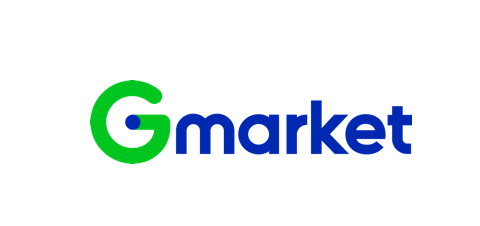

In [191]:
import requests
url = "https://browse.gmarket.co.kr/search"
payload = {'keyword': '공유기'}
r = requests.get(url, params=payload)
print(r.status_code)
print(r.text)

In [196]:
import requests
url = "https://shopping.naver.com/ns/home"
payload = {'keyword': '공유기'}
r = requests.get(url, params=payload)
print(r.status_code)
print(r.text)

200
<!DOCTYPE HTML>
<html lang="ko">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>
    <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=1.0,minimum-scale=1.0,user-scalable=no">
    <meta name="description" lang="ko" content="ì ì í ë¤ì íì¸í´ì£¼ì¸ì! : ë¤ì´ë² ì¼í">
    <title>ìë¬ íì´ì§ : ë¤ì´ë² ì¼í</title>
    <link rel="stylesheet" type="text/css" href="https://shopv.pstatic.net/web/maintenance/limit/naver_error.css">
    <script src="https://shopv.pstatic.net/web/maintenance/limit/grafolio.js"></script>
</head>
<body>
<div id="u_skip" class="u_skip">
    <a href="#content">ë³¸ë¬¸ ë°ë¡ê°ê¸°</a>
</div>
<div class="wrap">
    <div class="header" role="banner">
        <h1 class="logo">
            <a href="https://naver.com" class="logo_link">
                <img src="https://shopv.pstatic.net/web/maintenance/limit/naver_logo.png" width="90" height="16" alt="ë¤ì´ë²">
            </a>